# Environment and file preparation
Source illustration: codes of cell 2 to 7 are from "Assignment2_example"(https://github.com/fedhere/PUI2018_fb55/blob/master/HW3_fb55/Assignment2_example.ipynb)

In [1]:
from __future__ import print_function #for compatibility beteen python2 and python3

In [2]:
url = "https://data.cityofnewyork.us/resource/6b8a-2fci.json"

In [3]:
#use the appropriatepandas function to read in the json file
import pandas as pd
FDNY = pd.read_json(url)

In [4]:
# print it out
FDNY.head()

,averageresponsetime,incidentborough,incidentclassification,incidentcount,yearmonth
0,04:27,Citywide,All Fire/Emergency Incidents,40850,2009/07
1,04:32,Manhattan,All Fire/Emergency Incidents,10709,2009/07
2,04:37,Bronx,All Fire/Emergency Incidents,8137,2009/07
3,04:45,Staten Island,All Fire/Emergency Incidents,2205,2009/07
4,04:01,Brooklyn,All Fire/Emergency Incidents,11505,2009/07


# Data cleaning

In [5]:
#delete 2 columns:
FDNY_1=FDNY.drop(['incidentclassification', 'incidentborough'],axis=1)

#delete other invalid rows:
j=0
for i in range(1000):
    if i%42==0:
        j=j+1
    else:
        FDNY_1=FDNY_1.drop(FDNY_1.index[[j]])

        
#Conversion time format:
def ts(t):
    m,s = t.strip().split(":")
    return int(m) * 60 + int(s)

k=0
for i in range (24):
    k=(i)*42
    FDNY_1.averageresponsetime[k]=ts(FDNY_1.averageresponsetime[k])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Data Check

In [6]:
#FDNY_1

# Data plot

Populating the interactive namespace from numpy and matplotlib


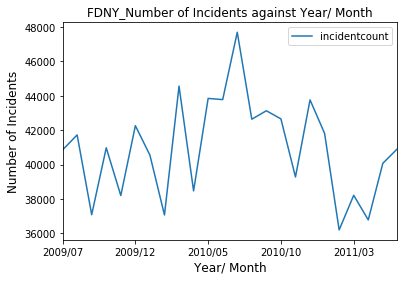

In [7]:
%pylab inline
ax=FDNY_1.plot(x='yearmonth',y='incidentcount')
ax.set_xlabel("Year/ Month",fontsize=12)
ax.set_ylabel("Number of Incidents",fontsize=12);
ax.set_title("FDNY_Number of Incidents against Year/ Month",fontsize=12);

Populating the interactive namespace from numpy and matplotlib


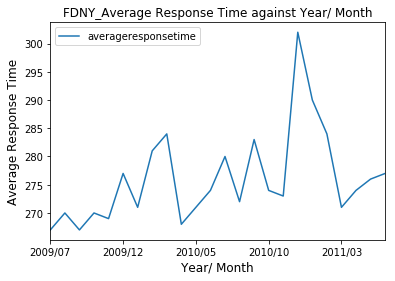

In [8]:
%pylab inline
bx=FDNY_1.plot(x='yearmonth',y='averageresponsetime')
bx.set_xlabel("Year/ Month",fontsize=12)
bx.set_ylabel("Average Response Time",fontsize=12);
bx.set_title("FDNY_Average Response Time against Year/ Month",fontsize=12);

Populating the interactive namespace from numpy and matplotlib


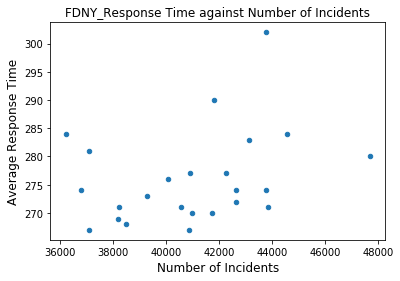

In [9]:
%pylab inline
ax=FDNY_1.plot(x='incidentcount',y='averageresponsetime',kind='scatter')
ax.set_xlabel("Number of Incidents",fontsize=12)
ax.set_ylabel("Average Response Time",fontsize=12);
ax.set_title("FDNY_Response Time against Number of Incidents",fontsize=12);